In [14]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [15]:
mat = np.load("Data/faceMatrix.npy").astype('float')
mat = mat.transpose()

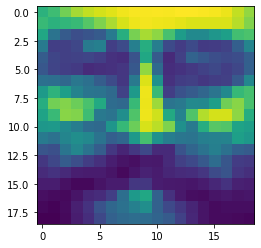

In [16]:
# test everything works fine
im = mat[1,0:].reshape(19,19)
plt.imshow(im)

In [52]:
## Some helpers

# compute the objective function on a set
def obj_func(set):
    sum = 0;
    for s1 in set:
        for s2 in set:
            sum += np.linalg.norm(s1-s2,2)
    return sum


# images: array of images, that should be printed
# shape: width * height of output
# path: where the image should be stored to
def print_images(images, shape, path):
    width = shape[0]
    height = shape[1]
    if not len(images) == width * height:
         raise ValueError("wrong shape")
        
    fig, axes = plt.subplots(width, height)
    # remove the x and y ticks
    for i in range(width):
        for j in range(height):
            axes[i, j].imshow(images[i*width+j].reshape(19,19))
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    fig.savefig(path)

In [45]:

# use k-means and choose k images that are near centroids
from scipy.cluster.vq import vq, kmeans, whiten

def findPointNearCentroid(centroid, points):
    # iterate through all points and find the nearest
    min_dif = np.infty
    point = None
    for p in points:
        dif = np.linalg.norm(p - centroid, 2)
        if dif < min_dif:
            point = p
            min_dif = dif
    return point
    

def approach1(N):    
    cluster = kmeans(mat, N)
    centroids = cluster[0]
    optimal_set = []

    for c in centroids:
        point = findPointNearCentroid(c, mat)
        optimal_set.append(point)
        
    return (optimal_set, obj_func(optimal_set))
    


In [46]:
#test approach 1

x = []
y = []

for N in range(20,200,10):
    res = approach1(N)
    x.append(N)
    y.append(res[1])
    
    
plt.plot(x,y, 'ro')

KeyboardInterrupt: 

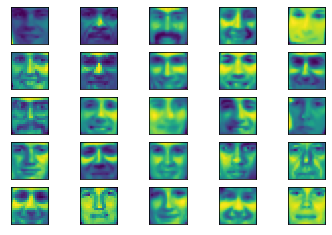

In [53]:
res = approach1(25)
print_images(res[0], (5,5), "Figures/t1-4-k4.png")

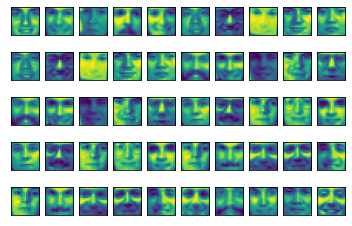

In [55]:
res = approach1(50)
print_images(res[0], (5,10), "Figures/t1-4-k9.png")

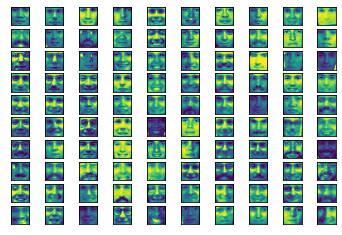

In [56]:
res = approach1(100)
print_images(res[0], (10,10), "Figures/t1-4-k16.png")